In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

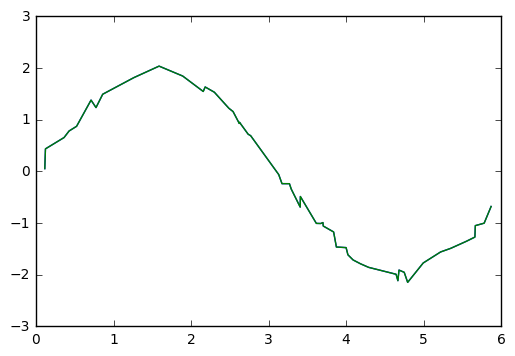

In [4]:
N = 50
np.random.seed(0)
x = np.sort(np.random.uniform(0, 6, N), axis=0)
y = 2*np.sin(x) + 0.1*np.random.randn(N)
x = x.reshape(-1, 1)
# print 'x =\n', x
# print 'y =\n', y
plt.plot(x,y)
plt.show()

In [5]:
print 'SVR - RBF'
svr_rbf = svm.SVR(kernel='rbf', gamma=0.2, C=100)
svr_rbf.fit(x, y)
print 'SVR - Linear'
svr_linear = svm.SVR(kernel='linear', C=100)
svr_linear.fit(x, y)
print 'SVR - Polynomial'
svr_poly = svm.SVR(kernel='poly', degree=3, C=100)
svr_poly.fit(x, y)
print 'Fit OK.'

SVR - RBF
SVR - Linear
SVR - Polynomial
Fit OK.


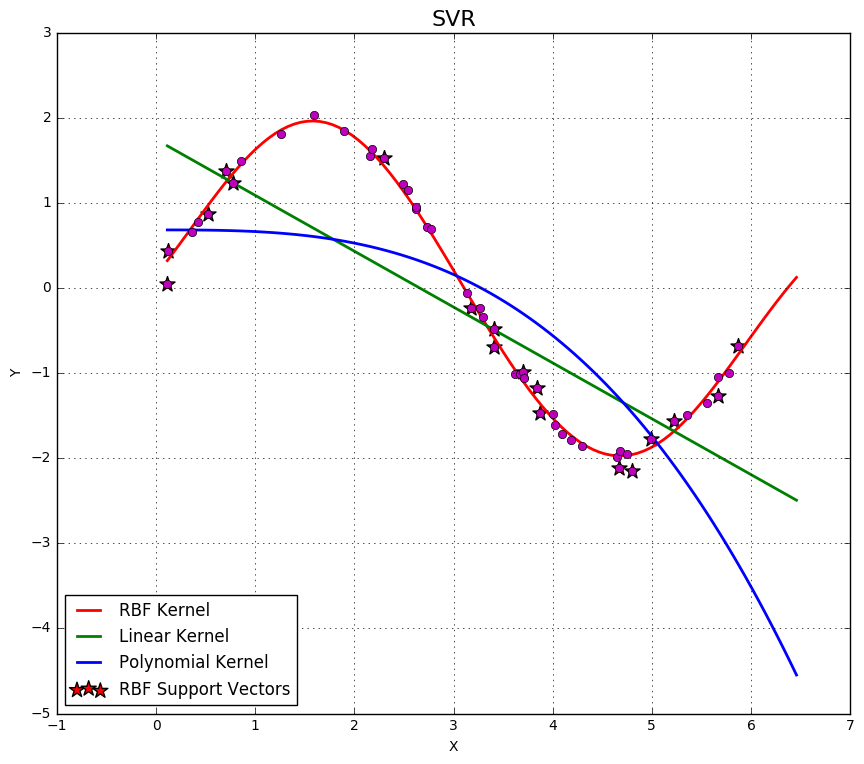

In [6]:
# 思考：系数1.1改成1.5
x_test = np.linspace(x.min(), 1.1*x.max(), 100).reshape(-1, 1)
y_rbf = svr_rbf.predict(x_test)
y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)

plt.figure(figsize=(9, 8), facecolor='w')
plt.plot(x_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(x_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
plt.plot(x_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
plt.plot(x, y, 'mo', markersize=6)
plt.scatter(x[svr_rbf.support_], y[svr_rbf.support_], s=130, c='r', marker='*', label='RBF Support Vectors')
plt.legend(loc='lower left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.tight_layout(2)
plt.show()


验证参数：
{'C': 35.938136638046259, 'gamma': 0.59948425031894093}


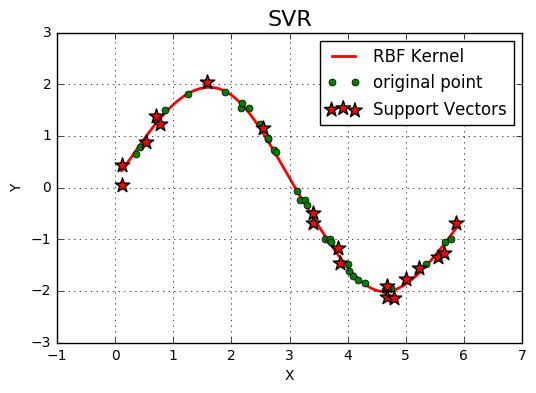

In [9]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV    # 0.17 grid_search
import matplotlib.pyplot as plt


if __name__ == "__main__":
    N = 50
    np.random.seed(0)
    x = np.sort(np.random.uniform(0, 6, N), axis=0)
    y = 2*np.sin(x) + 0.1*np.random.randn(N)
    x = x.reshape(-1, 1)
#     print 'x =\n', x
#     print 'y =\n', y

    model = svm.SVR(kernel='rbf')
    c_can = np.logspace(-2, 2, 10)
    gamma_can = np.logspace(-2, 2, 10)
    svr = GridSearchCV(model, param_grid={'C': c_can, 'gamma': gamma_can}, cv=5)
    svr.fit(x, y)
    print '验证参数：\n', svr.best_params_

    x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_hat = svr.predict(x_test)

    sp = svr.best_estimator_.support_
    plt.figure(facecolor='w')
    plt.scatter(x[sp], y[sp], s=120, c='r', marker='*', label='Support Vectors', zorder=3)
    plt.plot(x_test, y_hat, 'r-', linewidth=2, label='RBF Kernel')
    plt.plot(x, y, 'go', markersize=5,label='original point')
    plt.legend(loc='upper right')
    plt.title('SVR', fontsize=16)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


准确率：100.0%


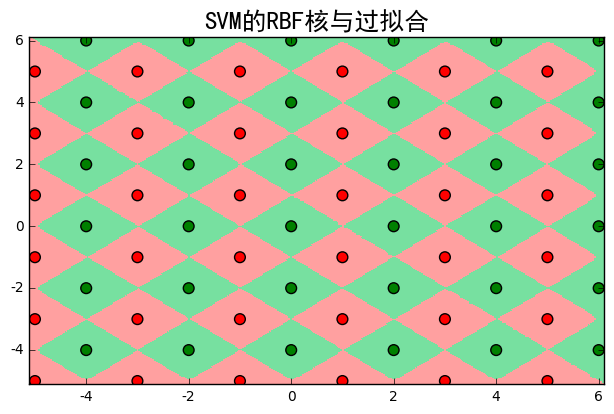

In [11]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt


def extend(a, b):
    # return a, b
    big, small = 1.01, 0.01
    return big*a-small*b, big*b-small*a


if __name__ == "__main__":
    t = np.linspace(-5, 5, 6)
    t1, t2 = np.meshgrid(t, t)
    x1 = np.stack((t1.ravel(), t2.ravel()), axis=1)
    N = len(x1)
    x2 = x1 + (1, 1)
    x = np.concatenate((x1, x2))
    y = np.array([1]*N + [-1]*N)

    clf = svm.SVC(C=0.1, kernel='rbf', gamma=5)
    clf.fit(x, y)
    y_hat = clf.predict(x)
    print '准确率：%.1f%%' % (np.mean(y_hat == y) * 100)

    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    x1_min, x1_max = extend(x[:, 0].min(), x[:, 0].max())  # 第0列的范围
    x2_min, x2_max = extend(x[:, 1].min(), x[:, 1].max())  # 第1列的范围
    x1, x2 = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
    grid_hat = clf.predict(grid_test)
    grid_hat.shape = x1.shape  # 使之与输入的形状相同
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], s=60, c=y, marker='o', cmap=cm_dark)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title(u'SVM的RBF核与过拟合', fontsize=18)
    plt.tight_layout(0.2)
    plt.show()


In [16]:
np.mgrid()

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1])